# COVID19 en Chile

In [1]:
# Configuración de paquetes/librerías

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Operating system interfaces
import os

# Core tools for working with streams
import io

# Simple HTTP library for Python
import requests

# Mathematical computation on arrays and matrices
import numpy as np

# Data manipulation
import pandas as pd
from datetime import datetime

# Data visualization
import matplotlib.pyplot as plt

# Output the graphs within the notebook itself
%matplotlib inline

# Configuring notebook for inline retina quality matplotlib figures (dpi=144 instead of dpi=72)
%config inlinebackend.figure_format = 'retina'

In [2]:
# Configuración de directorio de imágenes

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Covid_19_Figures")

os.makedirs(IMAGES_PATH, exist_ok=True)
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)
    
# Configuración predeterminada de imágenes

def style_fig():
    plt.style.use('ggplot')
    plt.figure(figsize=(12,6.75))
    plt.grid(True)

# Agregar textos a imágenes

def text_fig():
    plt.annotate('Actualizado al ' + str(ultima_fecha), 
                 xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
                 fontsize='small', va='top', ha='right')
    plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
                 xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
                 fontsize='small', va='top', ha='left')
    plt.annotate('Autor: @jccarvajal',
                 xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
                 fontsize='small', va='top', ha='right')

# Guardar imágenes en directorio

def save_fig(fig_id, tight_layout=False, fig_extension="png", resolution=200):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    text_fig()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## DP8 - Pacientes COVID-19 en UCI por región

In [3]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_T.csv'
dl = requests.get(url).content
dp8 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp8.rename(columns={'Region':'Fecha'},inplace=True)
dp8_edit = dp8.drop([0,1], axis=0)
dp8_edit['Fecha'] = pd.to_datetime(dp8_edit['Fecha'])
dp8_edit['Fecha'].tail(1)

685   2022-02-13
Name: Fecha, dtype: datetime64[ns]

In [4]:
# Paso 2: Transformar data
seleccion_regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo',
                      'Valparaíso','O’Higgins','Maule','Ñuble','Biobío','Araucanía',
                      'Los Ríos','Los Lagos','Aysén','Magallanes']
dp8_edit['Otras Regiones'] = dp8_edit[seleccion_regiones].sum(axis=1)

dp8_edit['Date'] = dp8_edit['Fecha']
dp8_edit['Date'] = dp8_edit['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp8_edit[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-13'

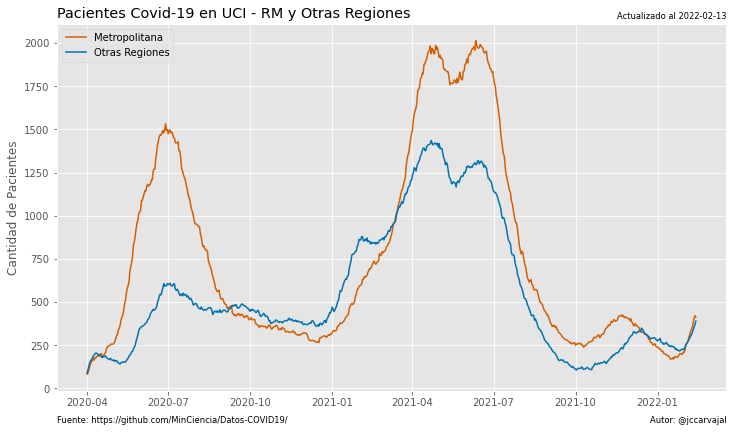

In [5]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp8_edit['Fecha'], dp8_edit['Metropolitana'],  color='#D55E00')
plt.plot(dp8_edit['Fecha'], dp8_edit['Otras Regiones'], color='#0072B2')
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper left')
plt.title('Pacientes Covid-19 en UCI - RM y Otras Regiones', loc='left')
plt.ylabel('Cantidad de Pacientes')
filename = 'DP08_Hospitalizados_UCI_Regiones'
save_fig(filename)
plt.show()

## DP9 - Pacientes COVID-19 en UCI por grupo de edad

In [6]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario_T.csv'
dl = requests.get(url).content
dp9 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp9.rename(columns={'Grupo de edad':'Fecha'},inplace=True)
dp9['Fecha'] = pd.to_datetime(dp9['Fecha'])

In [7]:
# Paso 2: Transformar data
dp9['Date'] = dp9['Fecha']
dp9['Date'] = dp9['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp9[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-13'

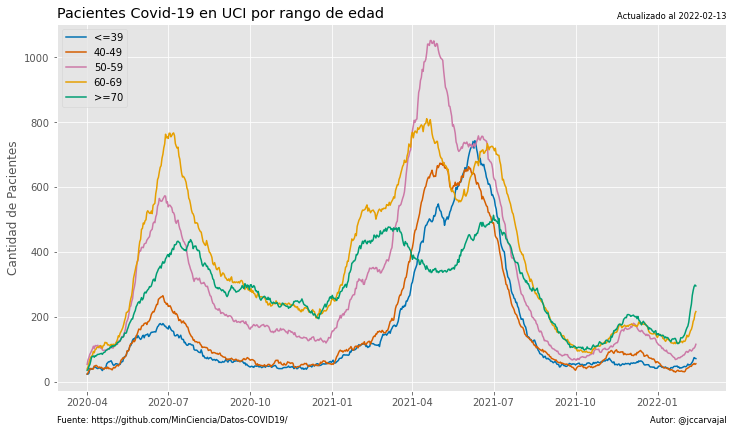

In [8]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp9['Fecha'], dp9['<=39'],  color='#0072B2')
plt.plot(dp9['Fecha'], dp9['40-49'], color='#D55E00')
plt.plot(dp9['Fecha'], dp9['50-59'], color='#CC79A7')
plt.plot(dp9['Fecha'], dp9['60-69'], color='#E69F00')
plt.plot(dp9['Fecha'], dp9['>=70'],  color='#009E73')
plt.legend(['<=39', '40-49', '50-59', '60-69', '>=70'], loc='upper left')
plt.title('Pacientes Covid-19 en UCI por rango de edad', loc='left')
plt.ylabel('Cantidad de Pacientes')
filename = 'DP09_Hospitalizados_UCI_Etario'
save_fig(filename)
plt.show()

## DP10 - Fallecidos con COVID-19 por grupo de edad

In [9]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario_T.csv'
dl = requests.get(url).content
dp10 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp10.rename(columns={'Grupo de edad':'Fecha'},inplace=True)
dp10['Fecha'] = pd.to_datetime(dp10['Fecha'])

In [10]:
# Paso 2: Transformar data
dp10['Date'] = dp10['Fecha']
dp10['Date'] = dp10['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp10[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-13'

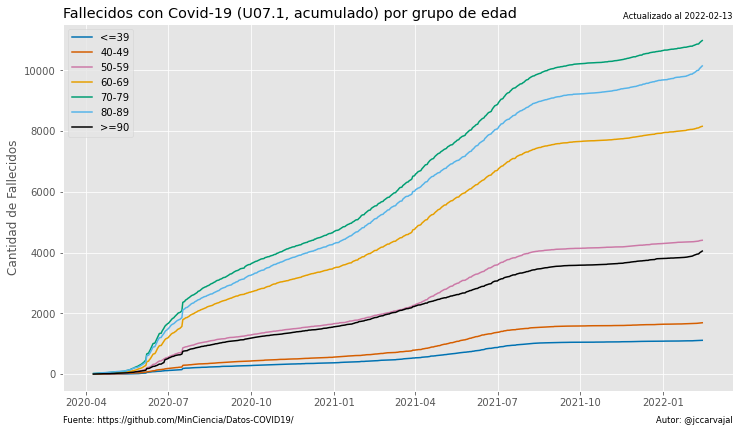

In [11]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp10['Fecha'], dp10['<=39'],  color='#0072B2')
plt.plot(dp10['Fecha'], dp10['40-49'], color='#D55E00')
plt.plot(dp10['Fecha'], dp10['50-59'], color='#CC79A7')
plt.plot(dp10['Fecha'], dp10['60-69'], color='#E69F00')
plt.plot(dp10['Fecha'], dp10['70-79'], color='#009E73')
plt.plot(dp10['Fecha'], dp10['80-89'], color='#56B4E9')
plt.plot(dp10['Fecha'], dp10['>=90'],  color='#000000')
plt.legend(['<=39', '40-49', '50-59', '60-69', '70-79', '80-89', '>=90'], loc='upper left')
plt.title('Fallecidos con Covid-19 (U07.1, acumulado) por grupo de edad', loc='left')
plt.ylabel('Cantidad de Fallecidos')
filename = 'DP10_Fallecidos_UCI_Etario_Acumulado'
save_fig(filename)
plt.show()

# DP03 - Casos totales por región

In [12]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv'
dl = requests.get(url).content
dp03 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp03.rename(columns={'Region':'Fecha','Total':'Nacional'},inplace=True)
dp03['Fecha'] = pd.to_datetime(dp03['Fecha'])

In [13]:
# Paso 2: Transformar data
dp03_edit1_mm = dp03.iloc[:, 0]
dp03_edit2_mm = dp03.diff(1).iloc[:, 1:18].rolling(7).mean()
dp03_edit_mm = pd.concat([dp03_edit1_mm, dp03_edit2_mm], axis=1)
#dp13_edit_mm.tail(1)

dp03_edit_mm['Date'] = dp03_edit_mm['Fecha']
dp03_edit_mm['Date'] = dp03_edit_mm['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp03_edit_mm[['Date']].tail(1).iloc[0]['Date']

Este producto cuenta los casos nuevos del día más los casos nuevos de días anteriores que vienen a ser informados con atraso.

# DP13 - Casos totales por región

In [14]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv'
dl = requests.get(url).content
dp13 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp13.rename(columns={'Region':'Fecha','Total':'Nacional'},inplace=True)
dp13['Fecha'] = pd.to_datetime(dp13['Fecha'])

In [15]:
# Paso 2: Transformar data
dp13_edit1_mm = dp13.iloc[:, 0]
dp13_edit2_mm = dp13.iloc[:, 1:18].rolling(7).mean()
dp13_edit_mm = pd.concat([dp13_edit1_mm, dp13_edit2_mm], axis=1)
dp13_edit_mm.tail(1)

dp13_edit_mm['Date'] = dp13_edit_mm['Fecha']
dp13_edit_mm['Date'] = dp13_edit_mm['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp13_edit_mm[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-13'

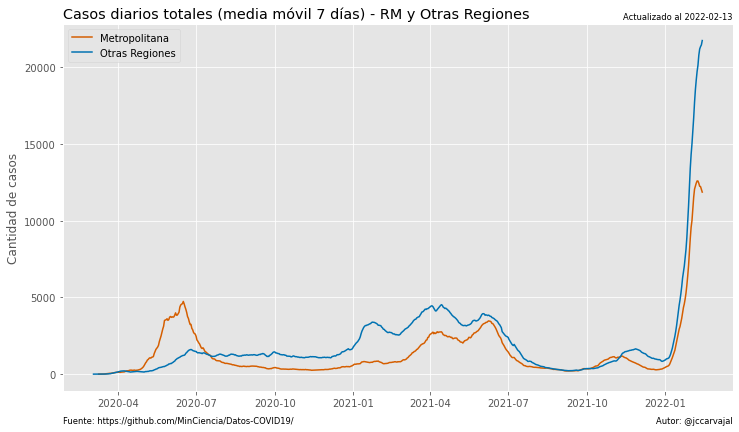

In [16]:
# Paso 3: Visualizar data
dp13_edit_or = dp13_edit_mm.copy()
seleccion_regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo',
                      'Valparaíso','O’Higgins','Maule','Ñuble','Biobío','Araucanía',
                      'Los Ríos','Los Lagos','Aysén','Magallanes']
dp13_edit_or['Otras Regiones'] = dp13_edit_or[seleccion_regiones].sum(axis=1)

style_fig()
plt.plot(dp13_edit_or['Fecha'], dp13_edit_or['Metropolitana'],  color='#D55E00')
plt.plot(dp13_edit_or['Fecha'], dp13_edit_or['Otras Regiones'],  color='#0072B2')
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper left')
plt.title('Casos diarios totales (media móvil 7 días) - RM y Otras Regiones', loc='left')
plt.ylabel('Cantidad de casos')
filename = 'DP13_Casos_Diarios_Totales_media_movil'
save_fig(filename)
plt.show()

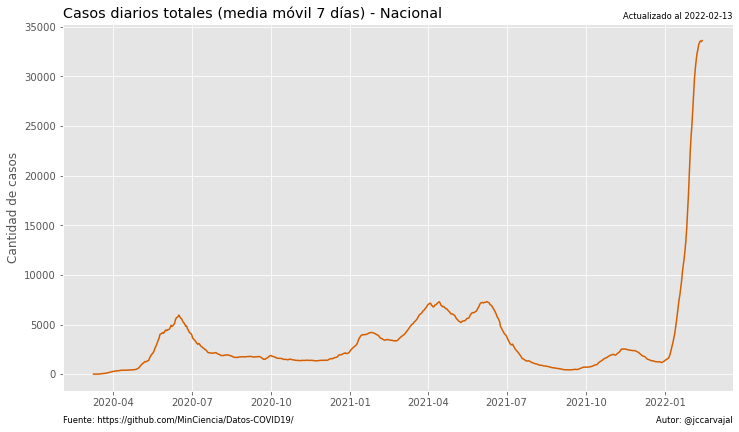

In [17]:
# Paso 3: Visualizar data
dp13_edit_nac = dp13_edit_mm.copy()

style_fig()
plt.plot(dp13_edit_nac['Fecha'], dp13_edit_nac['Nacional'],  color='#D55E00')
plt.title('Casos diarios totales (media móvil 7 días) - Nacional', loc='left')
plt.ylabel('Cantidad de casos')
filename = 'DP13_Casos_Diarios_Totales_media_movil_Nacional'
save_fig(filename)
plt.show()

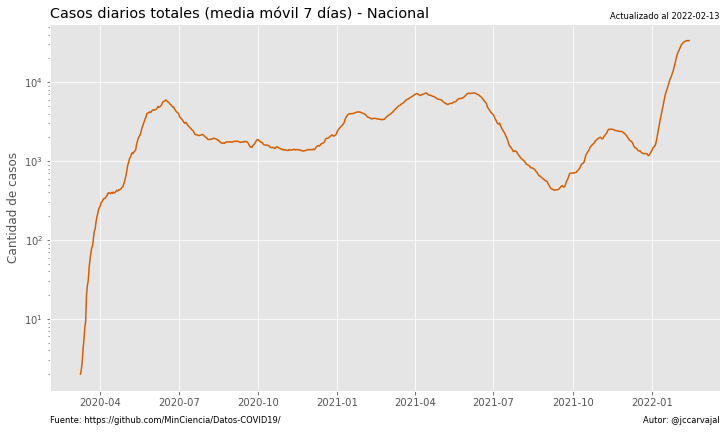

In [18]:
# Paso 3: Visualizar data
dp13_edit_nac = dp13_edit_mm.copy()

style_fig()
plt.plot(dp13_edit_nac['Fecha'], dp13_edit_nac['Nacional'],  color='#D55E00')
plt.title('Casos diarios totales (media móvil 7 días) - Nacional', loc='left')
plt.ylabel('Cantidad de casos')
plt.yscale("log")
filename = 'DP13_Casos_Diarios_Totales_media_movil_Nacional_log'
save_fig(filename)
plt.show()

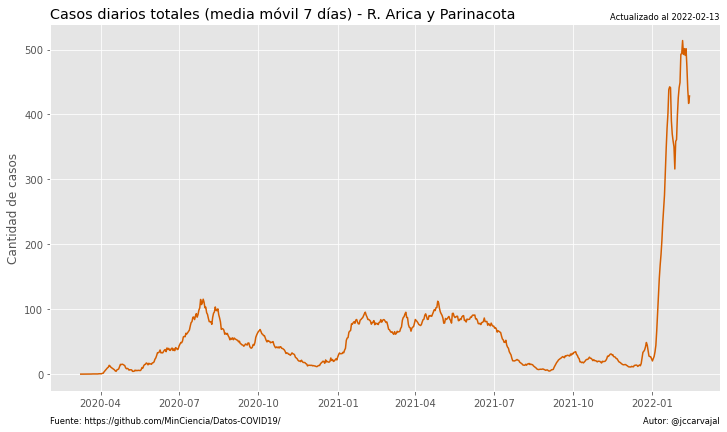

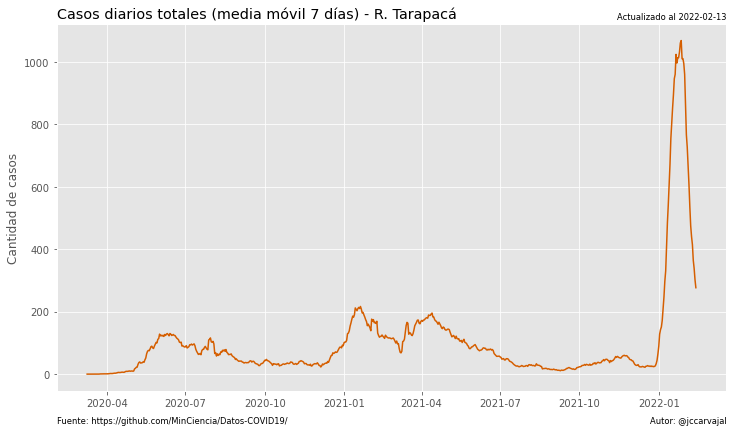

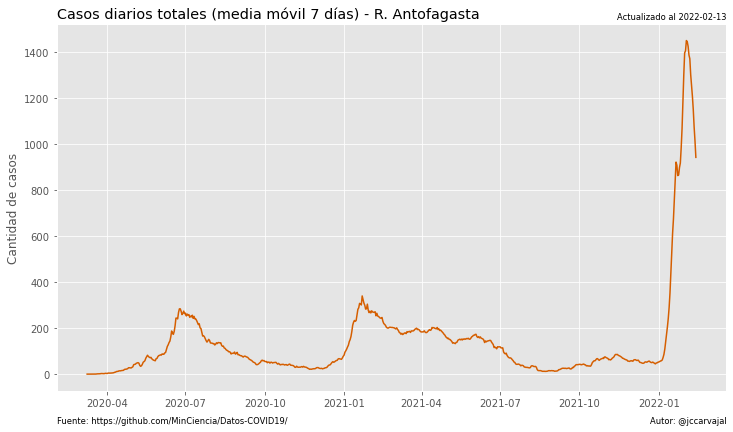

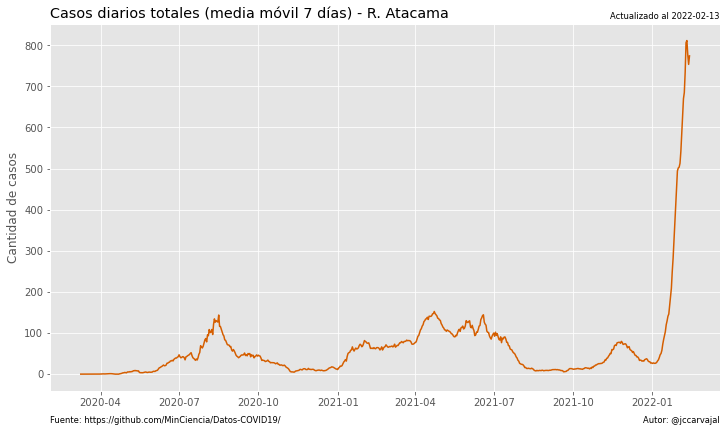

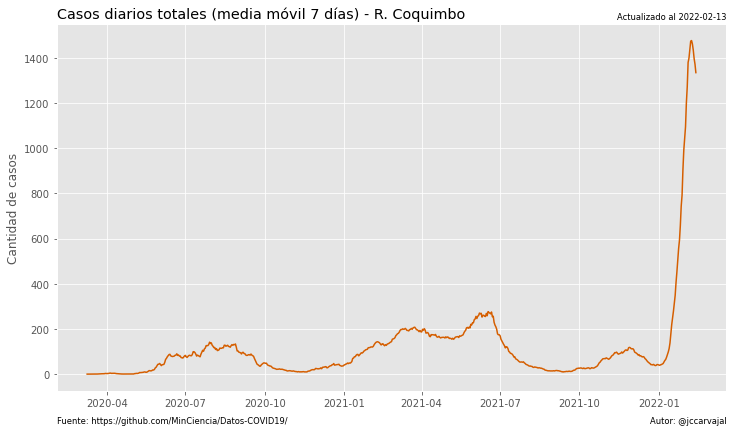

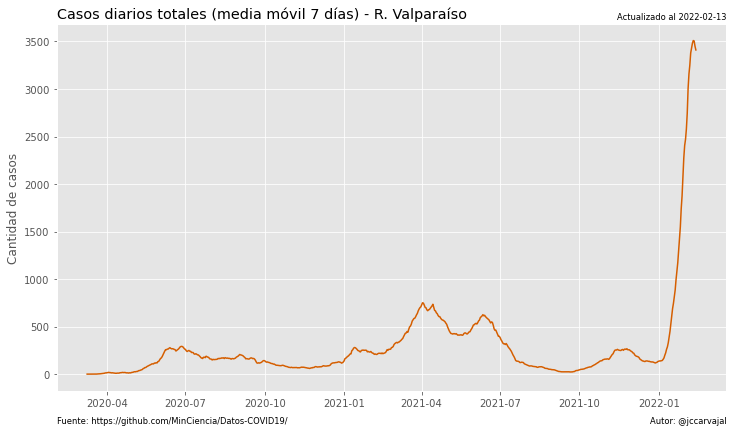

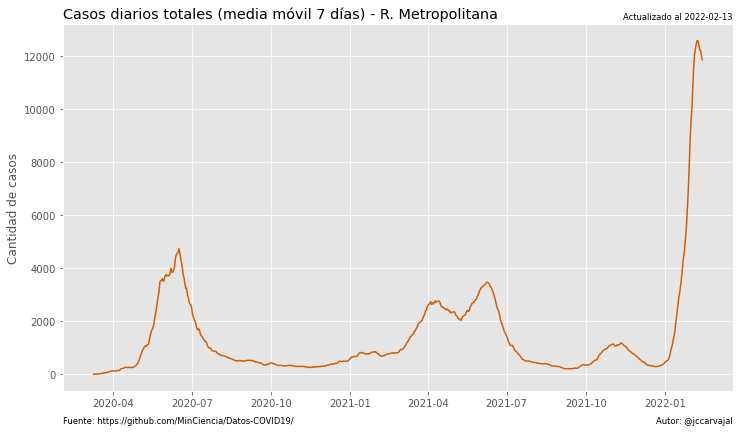

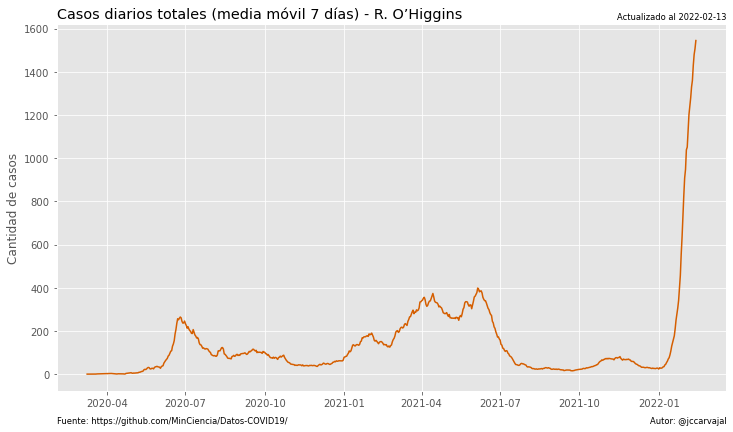

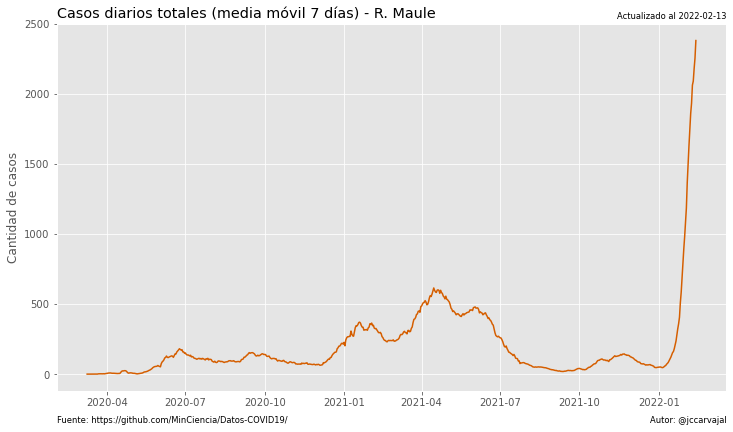

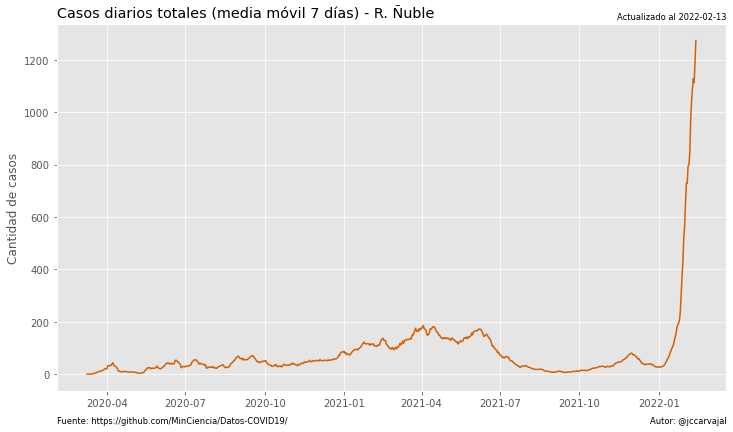

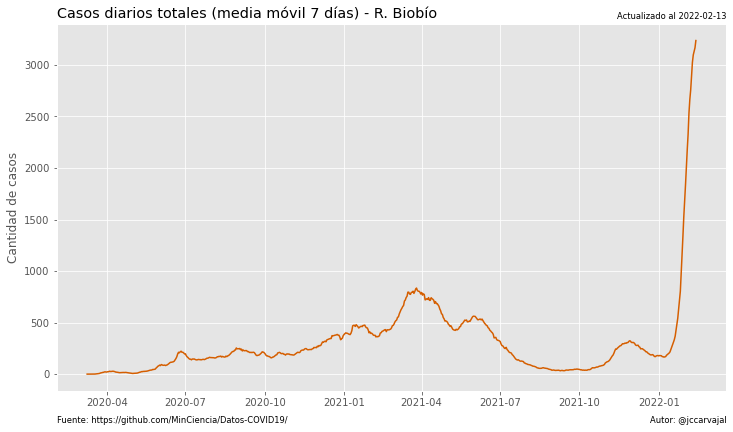

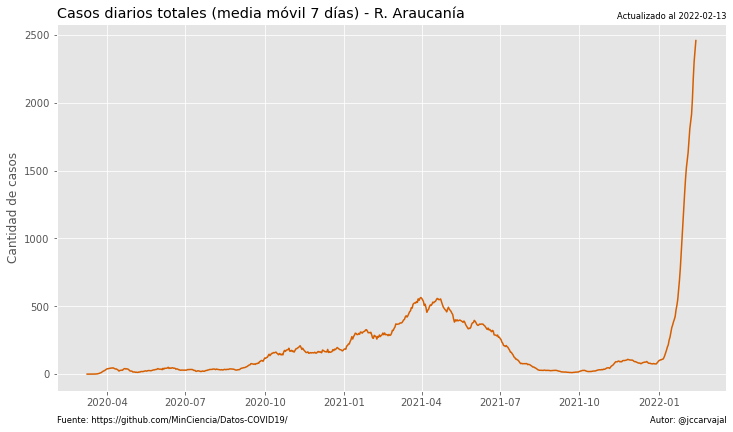

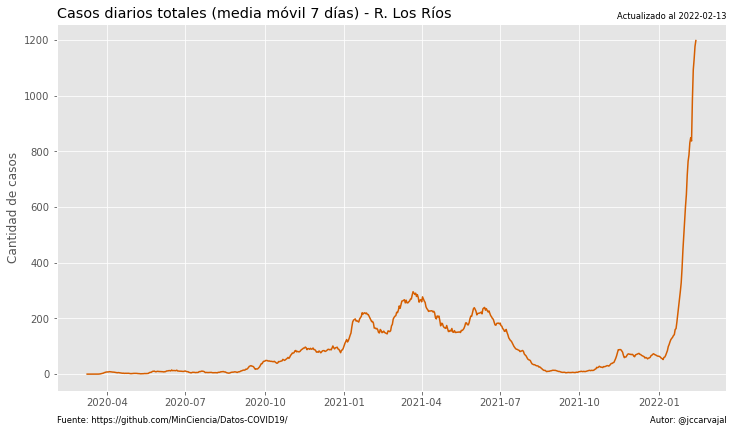

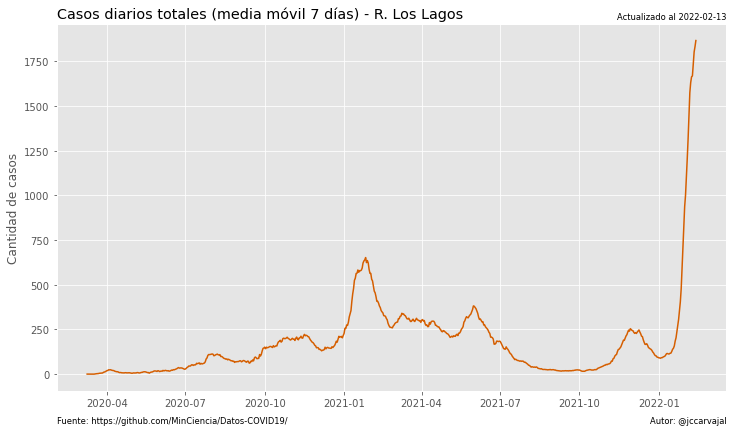

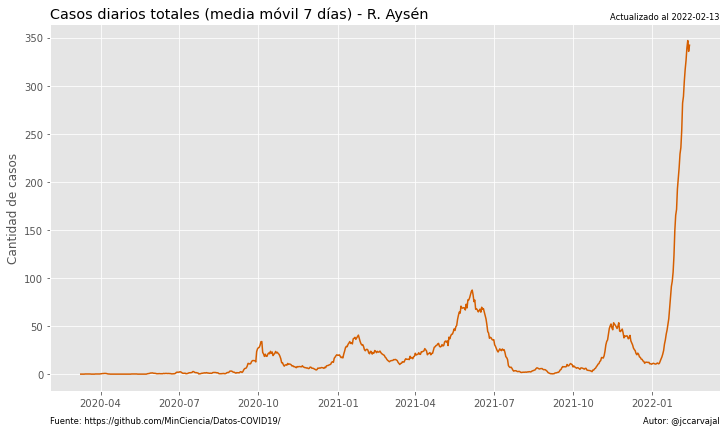

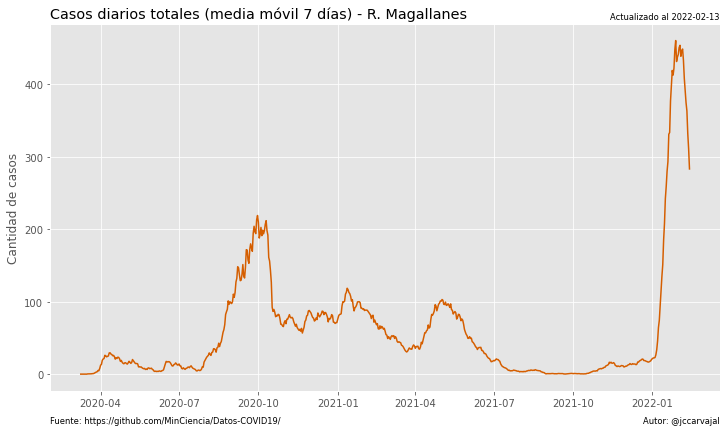

In [19]:
# Paso 3: Visualizar data
regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo',
            'Valparaíso','Metropolitana','O’Higgins','Maule','Ñuble','Biobío',
            'Araucanía','Los Ríos','Los Lagos','Aysén','Magallanes']
for column in dp13_edit_mm[regiones]:    
    style_fig()
    plt.plot(dp13_edit_mm['Fecha'], dp13_edit_mm[column], color='#D55E00')
    plt.title('Casos diarios totales (media móvil 7 días) - R. ' + str(column), loc='left')
    plt.ylabel('Cantidad de casos')
    filename = 'DP13_Casos_Diarios_Totales_media_movil_' + str(column)
    save_fig(filename)
    plt.show()

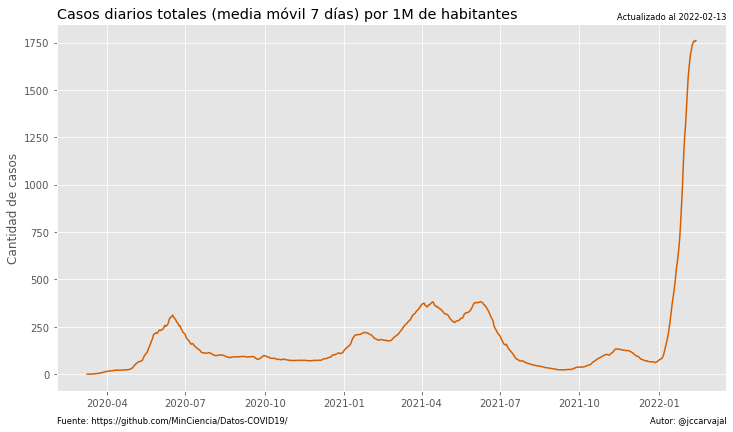

In [20]:
# Paso 3: Visualizar data
dp13_edit_pmh = dp13_edit_mm.copy()
habitantes = 19.1 #estimación en millones
dp13_edit_pmh['Nacional_PMH'] = dp13_edit_or['Nacional']/habitantes

style_fig()
plt.plot(dp13_edit_pmh['Fecha'], dp13_edit_pmh['Nacional_PMH'],  color='#D55E00')
plt.title('Casos diarios totales (media móvil 7 días) por 1M de habitantes', loc='left')
plt.ylabel('Cantidad de casos')
filename = 'DP13_Casos_Diarios_Totales_por_millon_habitantes'
save_fig(filename)
plt.show()

## DP07 - PCR

In [21]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR_T.csv'
dl = requests.get(url).content
dp07 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp07.rename(columns={'Region':'Fecha'},inplace=True)
dp07_edit = dp07.drop([0,1], axis=0).reset_index(drop=True)
dp07_edit['Fecha'] = pd.to_datetime(dp07_edit['Fecha'])
#dp07_edit

In [22]:
# Paso 2: Transformar data
seleccion_regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo',
                      'Valparaíso','O’Higgins','Maule','Ñuble','Biobío','Araucanía',
                      'Los Ríos','Los Lagos','Aysén','Magallanes']
dp07_edit['Otras Regiones'] = dp07_edit[seleccion_regiones].sum(axis=1)

dp07_edit1_mm = dp07_edit.iloc[:, 0]
dp07_edit2_mm = dp07_edit.iloc[:, 1:18].rolling(7).mean()
dp07_edit_mm = pd.concat([dp07_edit1_mm, dp07_edit2_mm], axis=1)
#dp07_edit_mm['Total'] = dp07_edit_mm.sum(axis=1)
dp07_edit_mm['Total'] = dp07_edit_mm['Otras Regiones'] + dp07_edit_mm['Metropolitana']
dp07_edit_mm.tail(5)

dp07_edit_mm['Date'] = dp07_edit_mm['Fecha']
dp07_edit_mm['Date'] = dp07_edit_mm['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp07_edit_mm[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-13'

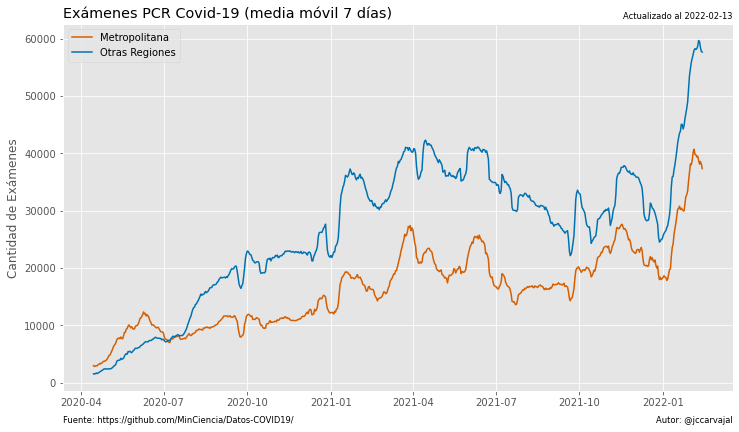

In [23]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp07_edit_mm['Fecha'], dp07_edit_mm['Metropolitana'],  color='#D55E00')
plt.plot(dp07_edit_mm['Fecha'], dp07_edit_mm['Otras Regiones'], color='#0072B2')
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper left')
plt.title('Exámenes PCR Covid-19 (media móvil 7 días)', loc='left')
plt.ylabel('Cantidad de Exámenes')
filename = 'DP07_Exámenes_PCR'
save_fig(filename)
plt.show()

## DP37 - Defunciones por COVID en Chile

In [24]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto37/Defunciones_deis_std.csv'
dl = requests.get(url).content
#dp37 = pd.read_csv(io.StringIO(dl.decode('utf-8')), decimal=',', thousands='.')
dp37 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp37 = dp37.loc[(dp37['Fecha'] != 'en verificación')]
dp37['Fecha'] = pd.to_datetime(dp37['Fecha'])

In [25]:
# Paso 2: Transformar data
dp37_e1 = dp37.loc[(dp37['Serie'] == 'sospechosos')]
most_recent_date_pub = dp37_e1['Publicacion'].max()
dp37_e11 = dp37_e1.loc[(dp37_e1['Publicacion'] == most_recent_date_pub)]
dp37_e11 = dp37_e11[['Fecha', 'Numero defunciones']].reset_index(drop=True)
dp37_e11.rename(columns={'Numero defunciones':'Sospechosos'},inplace=True)

dp37_e2 = dp37.loc[(dp37['Serie'] == 'confirmados')]
most_recent_date_cnf = dp37_e2['Publicacion'].max()
dp37_e22 = dp37_e2.loc[(dp37_e2['Publicacion'] == most_recent_date_cnf)]
dp37_e22 = dp37_e22[['Fecha', 'Numero defunciones']].reset_index(drop=True)
dp37_e22.rename(columns={'Numero defunciones':'Confirmados'},inplace=True)

dp37_f = pd.merge(dp37_e11, dp37_e22, on=['Fecha'])
dp37_f['Confirmados y sospechosos'] = dp37_f['Confirmados'] + dp37_f['Sospechosos']
ultima_fecha = most_recent_date_cnf

dp37_f_mm_1 = dp37_f.iloc[:, 0]
dp37_f_mm_2 = dp37_f.iloc[:, 1:4].rolling(7).mean()
dp37_f_mm = pd.concat([dp37_f_mm_1, dp37_f_mm_2], axis=1)

total_sosp = dp37_e11['Sospechosos'].sum().astype(int)
total_conf = dp37_e22['Confirmados'].sum().astype(int)
total_conf_sosp = total_conf + total_sosp

dp37_f.tail(10)

,Fecha,Sospechosos,Confirmados,Confirmados y sospechosos
686,2022-01-31,4,44,48
687,2022-02-01,6,63,69
688,2022-02-02,0,50,50
689,2022-02-03,0,63,63
690,2022-02-04,0,66,66
691,2022-02-05,0,75,75
692,2022-02-06,0,92,92
693,2022-02-07,0,67,67
694,2022-02-08,0,79,79
695,2022-02-09,0,14,14


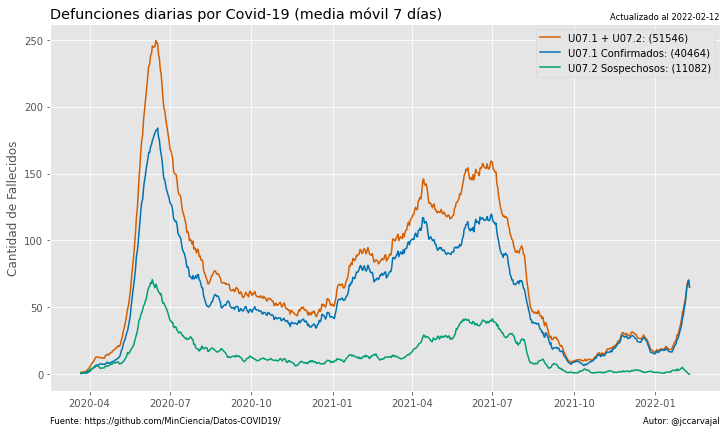

In [26]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp37_f_mm['Fecha'], dp37_f_mm['Confirmados y sospechosos'], color='#D55E00')
plt.plot(dp37_f_mm['Fecha'], dp37_f_mm['Confirmados'], color='#0072B2')
plt.plot(dp37_f_mm['Fecha'], dp37_f_mm['Sospechosos'], color='#009E73')
plt.legend(['U07.1 + U07.2: (' + str(total_conf_sosp) + ')',
            'U07.1 Confirmados: (' + str(total_conf) + ')',
            'U07.2 Sospechosos: (' + str(total_sosp) + ')'], loc='upper right')
plt.title('Defunciones diarias por Covid-19 (media móvil 7 días)', loc='left')
plt.ylabel('Cantidad de Fallecidos')
filename = 'DP37_Defunciones_Covid_confirmados_sospechosos'
save_fig(filename)
plt.show()

In [27]:
# Paso 2: Transformar data
dp37_e1 = dp37.loc[(dp37['Serie'] == 'sospechosos')]
most_recent_date_pub = dp37_e1['Publicacion'].max()
dp37_e11 = dp37_e1.loc[(dp37_e1['Publicacion'] == most_recent_date_pub)]
dp37_e11 = dp37_e11[['Fecha', 'Numero defunciones']].reset_index(drop=True)
dp37_e11.rename(columns={'Numero defunciones':'Sospechosos'},inplace=True)

dp37_e2 = dp37.loc[(dp37['Serie'] == 'confirmados')]
most_recent_date_cnf = dp37_e2['Publicacion'].max()
dp37_e22 = dp37_e2.loc[(dp37_e2['Publicacion'] == most_recent_date_cnf)]
dp37_e22 = dp37_e22[['Fecha', 'Numero defunciones']].reset_index(drop=True)
dp37_e22.rename(columns={'Numero defunciones':'Confirmados'},inplace=True)

dp37_f = pd.merge(dp37_e22, dp37_e11, on=['Fecha'])
dp37_f['Confirmados y sospechosos'] = dp37_f['Confirmados'] + dp37_f['Sospechosos']
ultima_fecha = most_recent_date_cnf

dp37_mes = dp37_f.groupby(pd.Grouper(key='Fecha', freq='1M')).sum()
dp37_mes.index = dp37_mes.index.strftime('%Y-%m')
#dp37_mes.columns = dp37_mes.columns.droplevel()
dp37_mes.tail(7)

,Confirmados,Sospechosos,Confirmados y sospechosos
Fecha,,,
2021-08,1270,359,1629
2021-09,427,108,535
2021-10,313,58,371
2021-11,656,54,710
2021-12,708,64,772
2022-01,706,71,777
2022-02,569,6,575


<Figure size 864x486 with 0 Axes>

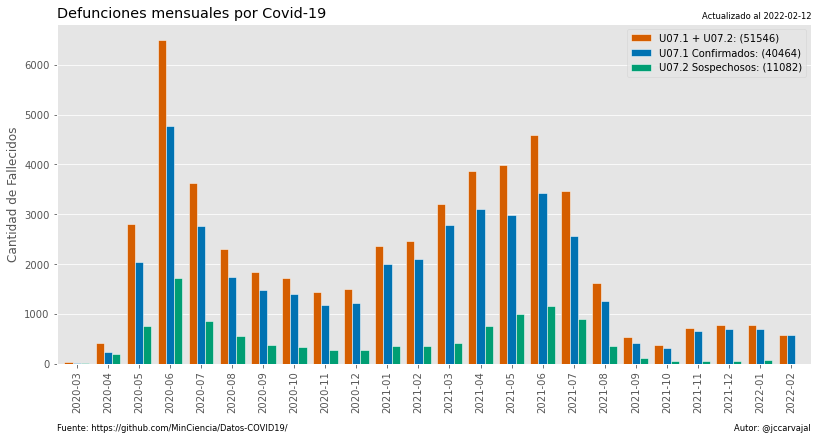

In [28]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
colores = ('#D55E00','#0072B2','#009E73')
dp37_mes[['Confirmados y sospechosos',
          'Confirmados','Sospechosos']].plot(kind='bar', rot=0, align='center', width=0.8, edgecolor='white',
                                             color=colores, stacked=False, figsize=(12,6.75))
plt.xticks(size = 10, rotation = 90)
plt.grid(axis='x')

plt.legend(['U07.1 + U07.2: (' + str(total_conf_sosp) + ')',
            'U07.1 Confirmados: (' + str(total_conf) + ')',
            'U07.2 Sospechosos: (' + str(total_sosp) + ')'], loc='upper right')
plt.title('Defunciones mensuales por Covid-19', loc='left')
plt.xlabel('')
plt.ylabel('Cantidad de Fallecidos')
filename = 'DP37_Defunciones_Covid_confirmados_sospechosos_mensual'

#plt.tight_layout(False)
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/', 
             xy=(0,0), xytext=(0,-60), xycoords='axes fraction', textcoords='offset points', 
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal', 
             xy=(1,0), xytext=(0,-60), xycoords='axes fraction', textcoords='offset points', 
             fontsize='small', va='top', ha='right')

#pad=0.4, w_pad=0.5, h_pad=1.0

plt.tight_layout(pad=3)
path = os.path.join(IMAGES_PATH, filename + "." + "png")
plt.savefig(path, format="png", dpi=200)
plt.show()

## Tasa de Positividad (PCR y AG)

In [29]:
# Paso 1: Importar data
# Data viene de DP07 (Exámenes PCR) y DP13 (Casos diarios totales)
# Corresponde a todo tipo de exámenes (PCR y AG)

In [30]:
# Paso 2: Transformar data

#Exámenes PCR
dp07_edit_tp = dp07_edit_mm[['Fecha', 'Metropolitana', 'Otras Regiones']].reset_index(drop=True)
dp07_edit_tp.rename(columns={'Metropolitana':'Metropolitana PCR',
                             'Otras Regiones':'Otras Regiones PCR'},inplace=True)
#Casos diarios
dp13_edit_tp = dp13_edit_or[['Fecha', 'Metropolitana', 'Otras Regiones']].reset_index(drop=True)
dp13_edit_tp.rename(columns={'Metropolitana':'Metropolitana Casos',
                             'Otras Regiones':'Otras Regiones Casos'},inplace=True)

positividad = pd.merge(dp07_edit_tp, dp13_edit_tp, on=['Fecha'])
positividad['Metropolitana'] = 100 * (positividad['Metropolitana Casos'] / positividad['Metropolitana PCR'])
positividad['Otras Regiones'] = 100 * (positividad['Otras Regiones Casos'] / positividad['Otras Regiones PCR'])

#TP = dp13_edit_tp / dp07_edit_tp 

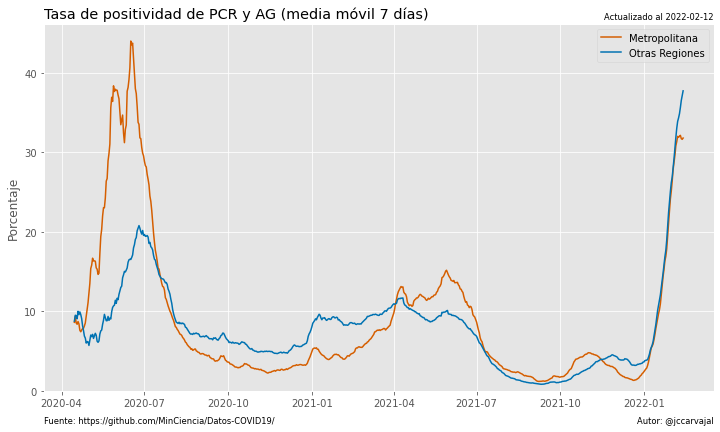

In [31]:
# Paso 3: Visualizar data
style_fig()
plt.plot(positividad['Fecha'], positividad['Metropolitana'],  color='#D55E00')
plt.plot(positividad['Fecha'], positividad['Otras Regiones'], color='#0072B2')
plt.ylim(ymin=0)
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper right')
plt.title('Tasa de positividad de PCR y AG (media móvil 7 días)', loc='left')
plt.ylabel('Porcentaje')
filename = 'Tasa Positividad_Covid_19_Regiones'
save_fig(filename)
plt.show()

### Desde Noviembre 2020

In [32]:
# Paso 2: Transformar data
positividad['Date'] = positividad['Fecha']
positividad['Date'] = positividad['Date'].dt.strftime('%Y-%m-%d')
end_date = positividad[['Date']].tail(1).iloc[0]['Date']
end_date

start_date = '2020-11-01'
#end_date = '2021-03-27'

after_start_date  = positividad["Fecha"] >= start_date
before_end_date   = positividad["Fecha"] <= end_date
between_two_dates = after_start_date & before_end_date
positividad_filtrada = positividad.loc[between_two_dates]
positividad_filtrada.tail(3)

,Fecha,Metropolitana PCR,Otras Regiones PCR,Metropolitana Casos,Otras Regiones Casos,Metropolitana,Otras Regiones,Date
673,2022-02-11,38564.428571,58460.714286,12230.285714,21355.571429,31.713904,36.529782,2022-02-11
674,2022-02-12,38103.285714,57760.571429,12053.571429,21467.142857,31.633942,37.165738,2022-02-12
675,2022-02-13,37330.285714,57646.428571,11869.857143,21752.285714,31.796856,37.733969,2022-02-13


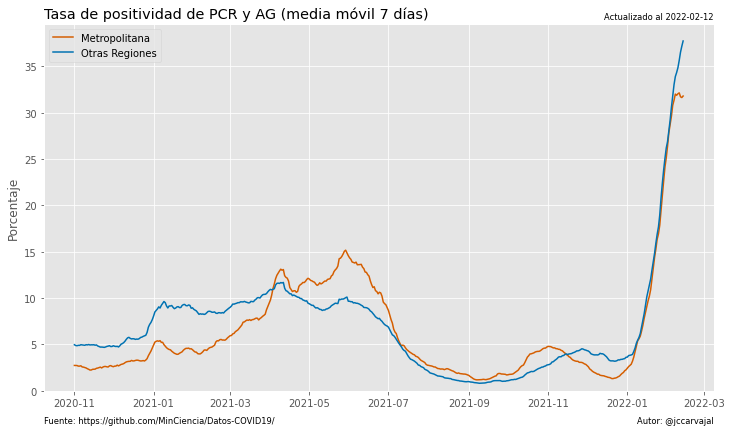

In [33]:
# Paso 3: Visualizar data
style_fig()
plt.plot(positividad_filtrada['Fecha'], positividad_filtrada['Metropolitana'],  color='#D55E00')
plt.plot(positividad_filtrada['Fecha'], positividad_filtrada['Otras Regiones'], color='#0072B2')
plt.ylim(ymin=0)
#plt.ylim(ymax=16)
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper left')
plt.title('Tasa de positividad de PCR y AG (media móvil 7 días)', loc='left')
plt.ylabel('Porcentaje')
filename = 'Tasa Positividad_Covid_19_Regiones_Acercamiento'
save_fig(filename)
plt.show()

## Positividad PCR

In [68]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto49/Positividad_Diaria_Media_T.csv'
dl = requests.get(url).content
dp49 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp49.rename(columns={'Region':'Fecha'},inplace=True)
dp49_edit = dp49.drop([0,1], axis=0).reset_index(drop=True)
dp49_edit['Fecha'] = pd.to_datetime(dp49_edit['Fecha'])
dp49_edit.tail()

,Fecha,pcr,casos pcr,casos ag,positividad pcr,mediamovil_positividad_pcr
684,2022-02-09,84477.0,22561.0,10801.0,0.2671,0.2400
685,2022-02-10,100253.0,26185.0,10450.0,0.2612,0.2443
686,2022-02-11,105942.0,27793.0,10653.0,0.2623,0.2476
687,2022-02-12,96467.0,25844.0,9997.0,0.2679,0.2510
688,2022-02-13,97147.0,25772.0,9266.0,0.2653,0.2559


In [69]:
# Paso 2: Transformar data

dp49_edit['positividad'] = 100 * (dp49_edit['mediamovil_positividad_pcr'])

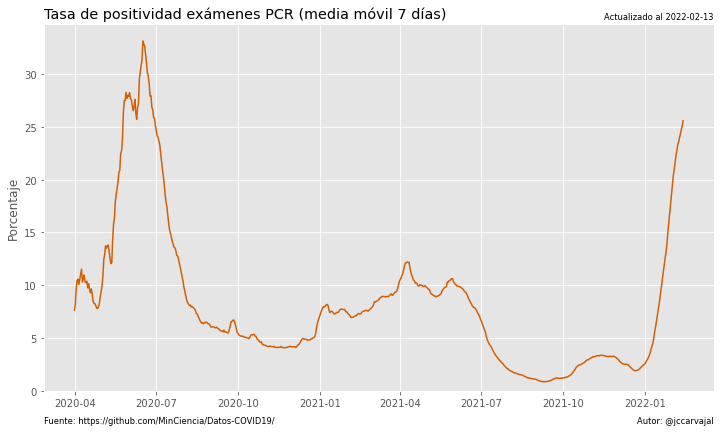

In [71]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp49_edit['Fecha'], dp49_edit['positividad'],  color='#D55E00')
plt.ylim(ymin=0)
#plt.ylim(ymax=16)
plt.title('Tasa de positividad exámenes PCR (media móvil 7 días)', loc='left')
plt.ylabel('Porcentaje')
filename = 'mediamovil_positividad_pcr'
save_fig(filename)
plt.show()

## DP20 - Ventiladores Disponibles/Ocupados

In [37]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto20/NumeroVentiladores_T.csv'
dl = requests.get(url).content
dp20 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp20.rename(columns={'Ventiladores':'Fecha', 'total':'Total', 
                     'disponibles':'Disponibles', 'ocupados':'Ocupados'},inplace=True)
dp20_edit = dp20.drop([0,1], axis=0).reset_index(drop=True)

reemplazos = ((['2020-09-30', 252.0, 0, 2067.0],   ['2020-09-30', 2524, 457, 2067]),
              (['2020-12-30', 2166, 2524.0, 1914], ['2020-12-30', 2166, 252, 1914]))
dp20_edit.replace(reemplazos,inplace=True)

dp20_edit['Fecha'] = pd.to_datetime(dp20_edit['Fecha'])
#dp20_edit['Disponibles'].max()

In [38]:
# Paso 2: Transformar data
dp20_edit['Date'] = dp20_edit['Fecha']
dp20_edit['Date'] = dp20_edit['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp20_edit[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-13'

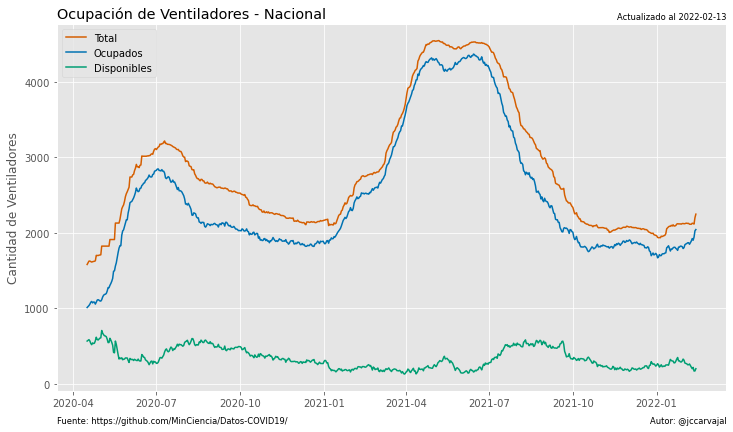

In [39]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp20_edit['Fecha'], dp20_edit['Total'],  color='#D55E00')
plt.plot(dp20_edit['Fecha'], dp20_edit['Ocupados'], color='#0072B2')
plt.plot(dp20_edit['Fecha'], dp20_edit['Disponibles'], color='#009E73')
plt.legend(['Total', 'Ocupados','Disponibles'], loc='upper left')
plt.title('Ocupación de Ventiladores - Nacional', loc='left')
plt.ylabel('Cantidad de Ventiladores')
filename = 'DP20_Ocupacion_Ventiladores'
save_fig(filename)
plt.show()

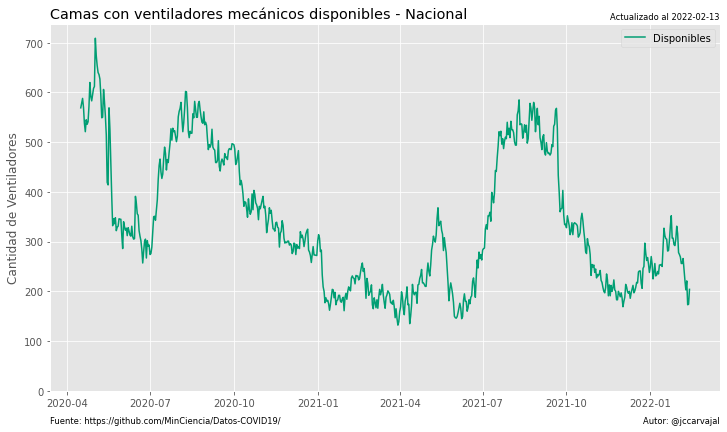

In [40]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp20_edit['Fecha'], dp20_edit['Disponibles'], color='#009E73')
plt.ylim(ymin=0)
plt.legend(['Disponibles'], loc='upper right')
plt.title('Camas con ventiladores mecánicos disponibles - Nacional', loc='left')
plt.ylabel('Cantidad de Ventiladores')
filename = 'DP20_Ventiladores_Disponibles'
save_fig(filename)
plt.show()

## DP24 - Hospitalización de pacientes COVID-19 en sistema integrado

In [41]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto24/CamasHospital_Diario_T.csv'
dl = requests.get(url).content
dp24 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp24.rename(columns={'Tipo de cama':'Fecha'},inplace=True)
dp24_edit = dp24.drop([0,1], axis=0).reset_index(drop=True)
dp24_edit['Fecha'] = pd.to_datetime(dp24_edit['Fecha'])
dp24_edit.tail(1)

,Fecha,Basica,Media,UTI,UCI
666,2022-02-13,1104,1626,684,803


In [42]:
# Paso 2: Transformar data
total_hospitalizaciones = ['Basica','Media','UTI','UCI']
dp24_edit['Hospitalizaciones'] = dp24_edit[total_hospitalizaciones].sum(axis=1)

dp24_edit['Date'] = dp24_edit['Fecha']
dp24_edit['Date'] = dp24_edit['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp24_edit[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-13'

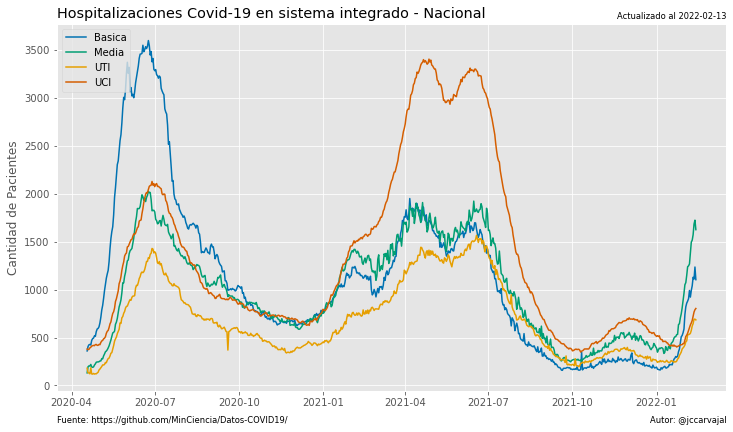

In [43]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp24_edit['Fecha'], dp24_edit['Basica'], color='#0072B2')
plt.plot(dp24_edit['Fecha'], dp24_edit['Media'], color='#009E73')
plt.plot(dp24_edit['Fecha'], dp24_edit['UTI'], color='#E69F00')
plt.plot(dp24_edit['Fecha'], dp24_edit['UCI'], color='#D55E00')
plt.legend(['Basica', 'Media','UTI','UCI'], loc='upper left')
plt.title('Hospitalizaciones Covid-19 en sistema integrado - Nacional', loc='left')
plt.ylabel('Cantidad de Pacientes')
filename = 'DP24_Hospitalizaciones'
save_fig(filename)
plt.show()

## Ventiladores Disponibles/Ocupados y Pacientes UCI


In [44]:
# Paso 2: Transformar data
hospitalizaciones = pd.merge(dp20_edit, dp24_edit, on=['Fecha'])
hospitalizaciones['Date'] = hospitalizaciones['Fecha']
hospitalizaciones['Date'] = hospitalizaciones['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = hospitalizaciones[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-13'

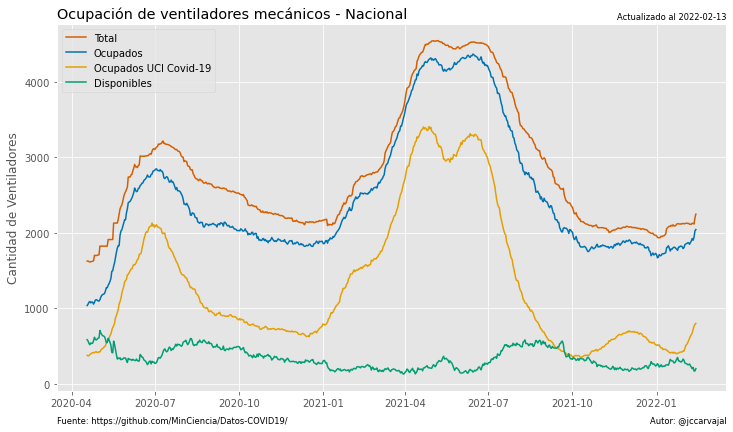

In [45]:
# Paso 3: Visualizar data
style_fig()
plt.plot(hospitalizaciones['Fecha'], hospitalizaciones['Total'],  color='#D55E00')
plt.plot(hospitalizaciones['Fecha'], hospitalizaciones['Ocupados'], color='#0072B2')
plt.plot(hospitalizaciones['Fecha'], hospitalizaciones['UCI'], color='#E69F00')
plt.plot(hospitalizaciones['Fecha'], hospitalizaciones['Disponibles'], color='#009E73')
plt.legend(['Total', 'Ocupados','Ocupados UCI Covid-19','Disponibles'], loc='upper left')
plt.title('Ocupación de ventiladores mecánicos - Nacional', loc='left')
plt.ylabel('Cantidad de Ventiladores')
filename = 'Ocupacion_Ventiladores_Covid'
save_fig(filename)
plt.show()

## DP1 - Casos totales por comuna 

In [46]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19_T.csv'
dl = requests.get(url).content
dp01 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp01_edit = dp01.drop([0,2,3], axis=0).reset_index(drop=True)

#Reemplaza nombre de columna con dato en primera fila
new_header = dp01_edit.iloc[0]
dp01_edit = dp01_edit[1:]
dp01_edit.columns = new_header

dp01_edit.rename(columns={'Comuna':'Fecha'},inplace=True)
dp01_edit = dp01_edit.loc[dp01_edit['Fecha'] != 'Tasa'].reset_index(drop=True)
dp01_edit['Fecha'] = pd.to_datetime(dp01_edit['Fecha'])

In [47]:
# Paso 2: Transformar data
dp01_edit_t = dp01_edit.iloc[:, 1:363].apply(pd.to_numeric)
dp01_edit1_mm = dp01_edit.iloc[:, 0]
dp01_edit2_mm = dp01_edit_t.iloc[:, 0:362].diff()
dp01_edit_mm = pd.concat([dp01_edit1_mm, dp01_edit2_mm], axis=1)
#dp01_edit_mm.tail(1)

dp01_edit_mm['Dias'] = dp01_edit_mm['Fecha'].diff().astype('timedelta64[D]')
widths = dp01_edit_mm['Dias'].shift(0)

dp01_edit_mm['Date'] = dp01_edit_mm['Fecha']
dp01_edit_mm['Date'] = dp01_edit_mm['Date'].dt.strftime('%Y-%m-%d')

ultima_fecha = dp01_edit_mm[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2022-02-11'

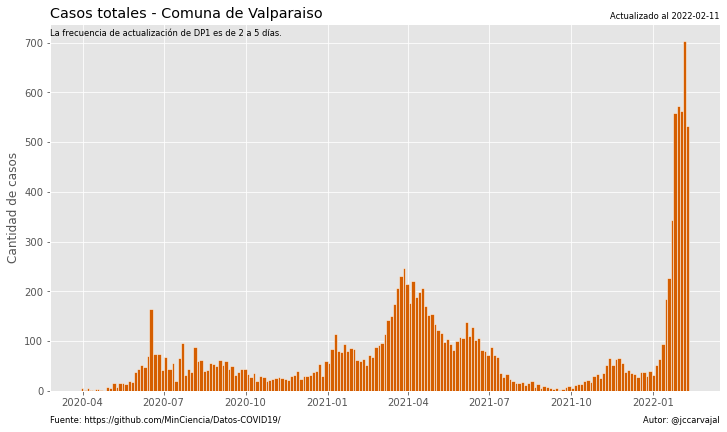

In [48]:
# Paso 3: Visualizar data

# Acá ingresar la comuna que se busca (sin tildes ni símbolos)
nombre_comuna = 'Valparaiso'

casos_comunas = dp01_edit_mm[nombre_comuna]/dp01_edit_mm['Dias']
casos_comunas_abs = abs(casos_comunas)

style_fig()

plt.bar(dp01_edit_mm['Fecha'], casos_comunas_abs, align='edge',
        color='#D55E00', width=-widths, edgecolor='white')
plt.title('Casos totales - Comuna de ' + str(nombre_comuna), loc='left')
plt.ylabel('Cantidad de casos')

plt.annotate('La frecuencia de actualización de DP1 es de 2 a 5 días.', 
             xy=(0,1), xytext=(0,-12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small')

filename = 'DP01_Casos_Totales_media_movil_' + str(nombre_comuna)
save_fig(filename)
plt.show()

Nota: El 20 de julio de 2020 da valor negativo en Valparaíso y Viña del Mar. 
¿No se qué diantres pasó?
No obstante,
se implementó código para mostrar sólo valores absolutos.

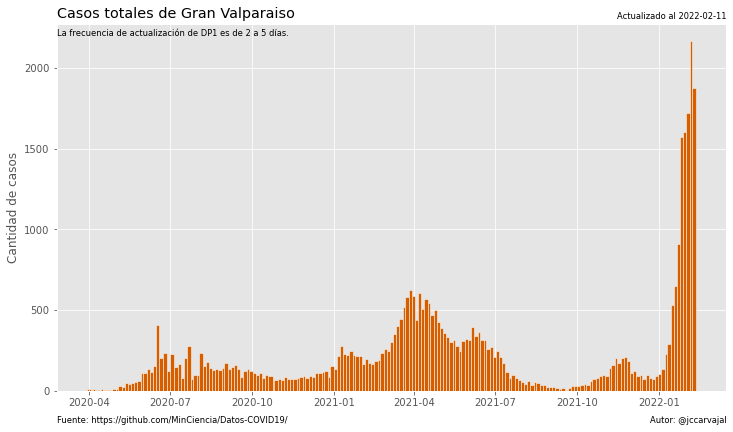

In [49]:
# Paso 3: Visualizar data

# Gran Valparaíso

gran_valparaiso = ['Valparaiso','Vina del Mar','Concon','Quilpue','Villa Alemana']
dp01_edit_mm['Gran Valparaiso'] = dp01_edit_mm[gran_valparaiso].sum(axis=1)

nombre_comuna = 'Gran Valparaiso'

casos_comunas = dp01_edit_mm[nombre_comuna]/dp01_edit_mm['Dias']
casos_comunas_abs = abs(casos_comunas)

style_fig()

plt.bar(dp01_edit_mm['Fecha'], casos_comunas_abs, align='edge',
        color='#D55E00', width=-widths, edgecolor='white')
plt.title('Casos totales de ' + str(nombre_comuna), loc='left')
plt.ylabel('Cantidad de casos')

plt.annotate('La frecuencia de actualización de DP1 es de 2 a 5 días.', 
             xy=(0,1), xytext=(0,-12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small')

filename = 'DP01_Casos_Totales_media_movil_' + str(nombre_comuna)
save_fig(filename)
plt.show()

## DP76 - Avance en Campaña de Vacunación COVID-19

In [50]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto76/vacunacion_t.csv'
dl = requests.get(url).content
dp76 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp76_edit = dp76[['Region', 'Total','Total.1','Total.2','Total.3','Total.4']]

#Reemplaza nombre de columna con dato en primera fila
new_header = dp76_edit.iloc[0]
dp76_edit = dp76_edit[1:]
dp76_edit.columns = new_header

In [51]:
# Paso 2: Transformar data
dp76_edit.rename(columns={'Dosis':'Fecha'},inplace=True)
dp76_edit['Fecha']   = pd.to_datetime(dp76_edit['Fecha'])
dp76_edit['Primera'] = dp76_edit['Primera'].apply(pd.to_numeric)
dp76_edit['Segunda'] = dp76_edit['Segunda'].apply(pd.to_numeric)
dp76_edit['Unica'] = dp76_edit['Unica'].apply(pd.to_numeric)
dp76_edit['Refuerzo'] = dp76_edit['Refuerzo'].apply(pd.to_numeric)
dp76_edit['Cuarta'] = dp76_edit['Cuarta'].apply(pd.to_numeric)

habitantes = 19458310 #Población estimada en DP1 de Minciencia
#habitantes = 19001050 #Población estimada usada para cálculo Minsal para población objetivo de 15200840 (80%)

dp76_edit['Primera_Unica_100'] = 100 * ((dp76_edit['Primera'] + dp76_edit['Unica']) / habitantes)
dp76_edit['Segunda_Unica_100'] = 100 * ((dp76_edit['Segunda'] + dp76_edit['Unica']) / habitantes)
dp76_edit['Refuerzo_100'] = 100 * (dp76_edit['Refuerzo'] / habitantes)
dp76_edit['Cuarta_100'] = 100 * (dp76_edit['Cuarta'] / habitantes)

dp76_edit['Date'] = dp76_edit['Fecha']
dp76_edit['Date'] = dp76_edit['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp76_edit[['Date']].tail(1).iloc[0]['Date']

dp76_edit.tail(3)

,Fecha,Primera,Segunda,Unica,Refuerzo,Cuarta,Primera_Unica_100,Segunda_Unica_100,Refuerzo_100,Cuarta_100,Date
413,2022-02-09,17109288.0,16484852.0,574159.0,12676710.0,421153.0,90.878637,87.669541,65.148052,2.164386,2022-02-09
414,2022-02-10,17117147.0,16497860.0,574163.0,12698371.0,448279.0,90.919047,87.736412,65.259372,2.303792,2022-02-10
415,2022-02-11,17121523.0,16505838.0,574164.0,12712174.0,464925.0,90.941541,87.777417,65.330309,2.389339,2022-02-11


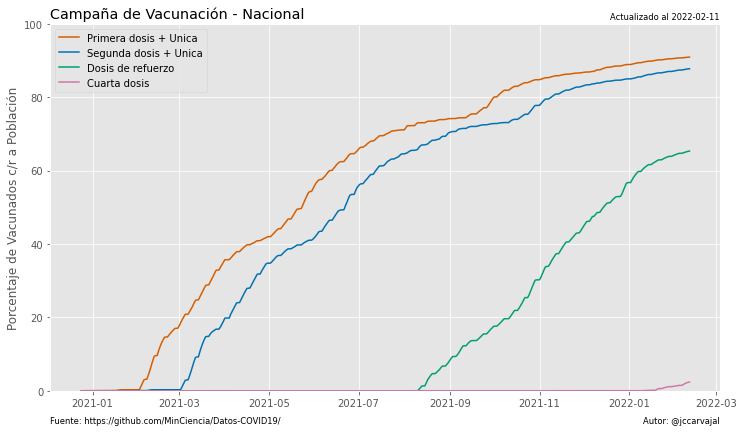

In [52]:
# Paso 3: Visualizar data
style_fig()
plt.plot(dp76_edit['Fecha'], dp76_edit['Primera_Unica_100'], color='#D55E00')
plt.plot(dp76_edit['Fecha'], dp76_edit['Segunda_Unica_100'], color='#0072B2')
plt.plot(dp76_edit['Fecha'], dp76_edit['Refuerzo_100'], color='#009E73')
plt.plot(dp76_edit['Fecha'], dp76_edit['Cuarta_100'], color='#CC79A7')
plt.ylim(ymin=0)
plt.ylim(ymax=100)

plt.legend(['Primera dosis + Unica', 'Segunda dosis + Unica', 'Dosis de refuerzo', 'Cuarta dosis'], loc='upper left')
plt.title('Campaña de Vacunación - Nacional', loc='left')
plt.ylabel('Porcentaje de Vacunados c/r a Población')
filename = 'Campaña_Vacunacion_Nacional'
save_fig(filename)
plt.show()

## Casos, hospitalizaciones y defunciones

In [53]:
# Paso 1: Importar data
# Data viene de DP13 (Casos diarios totales), DP24 (Hospitalización de pacientes) y DP37 (Defunciones)

In [54]:
# Paso 2: Transformar data

#Exámenes PCR
examenes_pcr_nacional = dp07_edit_mm[['Fecha', 'Total']].reset_index(drop=True)

#Casos diarios
casos_diarios_nacional = dp13_edit_nac[['Fecha', 'Nacional']].reset_index(drop=True)

#Hospitalizaciones
hospitalizaciones_total = dp24_edit[['Fecha', 'Hospitalizaciones','UCI']].reset_index(drop=True)

#Defunciones
defunciones_nacional = dp37_f_mm[['Fecha', 'Confirmados y sospechosos', 'Confirmados']].reset_index(drop=True)

#Vacunación
vacunacion = dp76_edit[['Fecha','Primera_Unica_100','Segunda_Unica_100','Refuerzo_100','Cuarta_100']].reset_index(drop=True) 

#Merge
los_dos_casos = pd.merge(examenes_pcr_nacional, casos_diarios_nacional, on=['Fecha'])
los_tres_casos = pd.merge(los_dos_casos, hospitalizaciones_total, on=['Fecha'])
los_cuatro_casos = pd.merge(los_tres_casos, defunciones_nacional, how="left", on=['Fecha'])
resumen = pd.merge(los_cuatro_casos, vacunacion, how="left", on=['Fecha'])

resumen['Date'] = resumen['Fecha']
resumen['Date'] = resumen['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = resumen[['Date']].tail(1).iloc[0]['Date']
resumen.tail(5)

,Fecha,Total,Nacional,Hospitalizaciones,UCI,Confirmados y sospechosos,Confirmados,Primera_Unica_100,Segunda_Unica_100,Refuerzo_100,Cuarta_100,Date
662,2022-02-09,98502.714286,33240.714286,3855,678,65.142857,65.142857,90.878637,87.669541,65.148052,2.164386,2022-02-09
663,2022-02-10,97591.285714,33446.142857,4067,720,NaN,NaN,90.919047,87.736412,65.259372,2.303792,2022-02-10
664,2022-02-11,97025.142857,33585.857143,4252,766,NaN,NaN,90.941541,87.777417,65.330309,2.389339,2022-02-11
665,2022-02-12,95863.857143,33520.714286,4443,790,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-12
666,2022-02-13,94976.714286,33622.142857,4217,803,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-13


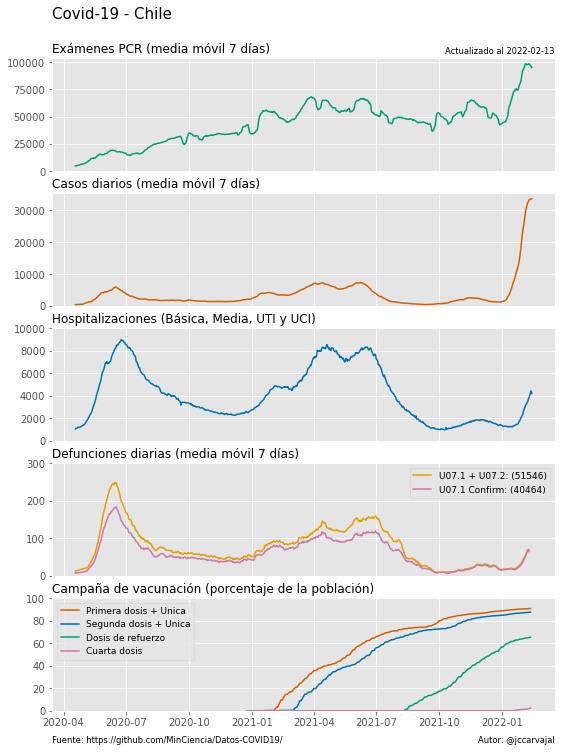

In [55]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(9,12))
plt.suptitle('Covid-19 - Chile', x=0.125, y=0.94, ha='left', va='top', fontsize = 15)

#dp07_edit_mm

#plt.subplot(511)
ax1 = plt.subplot(511)
plt.plot(resumen['Fecha'], resumen['Total'], color='#009E73')
plt.title('Exámenes PCR (media móvil 7 días)', fontsize = 12, loc='left')
plt.ylim(ymin=0)
#plt.ylim(ymax=80000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid(True)
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')

#plt.subplot(512)
ax2 = plt.subplot(512, sharex = ax1)
plt.plot(resumen['Fecha'], resumen['Nacional'], color='#D55E00')
plt.title('Casos diarios (media móvil 7 días)', fontsize = 12, loc='left')
plt.ylim(ymin=0)
#plt.yscale("log")
#plt.ylim(ymax=30000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid(True)

#plt.subplot(513)
ax3 = plt.subplot(513, sharex = ax1)
plt.plot(resumen['Fecha'], resumen['Hospitalizaciones'], color='#0072B2')
#plt.plot(resumen['Fecha'], resumen['UCI'], color='#FA9F42')
#plt.legend(['Básica, Media, UTI y UCI', 'Sólo UCI'], loc='upper right', prop={'size': 9})
plt.title('Hospitalizaciones (Básica, Media, UTI y UCI)', fontsize = 12, loc='left')
plt.ylim(ymin=0)
plt.ylim(ymax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid(True)

#plt.subplot(514)
ax4 = plt.subplot(514, sharex = ax1)
plt.plot(resumen['Fecha'], resumen['Confirmados y sospechosos'], color='#E69F00')
plt.plot(resumen['Fecha'], resumen['Confirmados'], color='#CC79A7')
plt.title('Defunciones diarias (media móvil 7 días)', fontsize = 12, loc='left')
plt.ylim(ymin=0)
plt.ylim(ymax=300)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.legend(['U07.1 + U07.2: (' + str(total_conf_sosp) + ')',], loc='upper right', prop={'size': 9})
plt.legend(['U07.1 + U07.2: (' + str(total_conf_sosp) + ')',
            'U07.1 Confirm: (' + str(total_conf) + ')'], loc='upper right', prop={'size': 9})
plt.grid(True)

#plt.subplot(515)
ax5 = plt.subplot(515, sharex = ax1)
plt.plot(resumen['Fecha'], resumen['Primera_Unica_100'], color='#D55E00')
plt.plot(resumen['Fecha'], resumen['Segunda_Unica_100'], color='#0072B2')
plt.plot(resumen['Fecha'], resumen['Refuerzo_100'], color='#009E73')
plt.plot(resumen['Fecha'], resumen['Cuarta_100'], color='#CC79A7')
plt.legend(['Primera dosis + Unica', 'Segunda dosis + Unica', 'Dosis de refuerzo', 'Cuarta dosis'], loc='upper left', prop={'size': 9})
plt.title('Campaña de vacunación (porcentaje de la población)', fontsize = 12, loc='left')
plt.ylim(ymin=0)
plt.ylim(ymax=100)
plt.xticks(size = 10, rotation = 0)
plt.grid(True)

plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Casos_diarios_hospitalizaciones_defunciones_vacunacion.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## Work in Progress (WIP)

In [56]:
# Paso 2: Transformar data
resumen['Date'] = resumen['Fecha']
resumen['Date'] = resumen['Date'].dt.strftime('%Y-%m-%d')

start_date_1 = '2020-01-01'
end_date_1   = '2021-01-01'
start_date_2 = '2021-01-01'
end_date_2   = '2022-01-01'
start_date_3 = '2022-01-01'
end_date_3   = resumen[['Date']].tail(1).iloc[0]['Date']

after_start_date_1  = resumen["Fecha"] >= start_date_1
before_end_date_1   = resumen["Fecha"] <= end_date_1
after_start_date_2  = resumen["Fecha"] >= start_date_2
before_end_date_2   = resumen["Fecha"] <= end_date_2
after_start_date_3  = resumen["Fecha"] >= start_date_3
before_end_date_3   = resumen["Fecha"] <= end_date_3

between_two_dates_1 = after_start_date_1 & before_end_date_1
between_two_dates_2 = after_start_date_2 & before_end_date_2
between_two_dates_3 = after_start_date_3 & before_end_date_3

resumen_filtrada_1 = resumen.loc[between_two_dates_1]
resumen_filtrada_2 = resumen.loc[between_two_dates_2]
resumen_filtrada_3 = resumen.loc[between_two_dates_3]

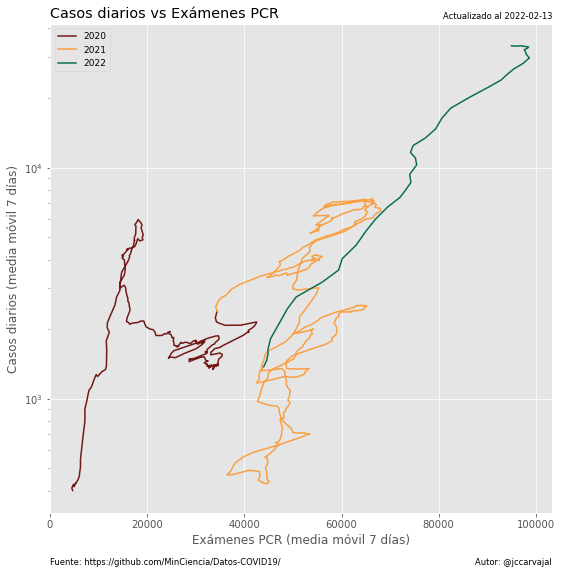

In [57]:
# Paso 3: Visualizar data
#style_fig()
plt.figure(figsize=(9,9))

x_1 = resumen_filtrada_1['Total']
y_1 = resumen_filtrada_1['Nacional']
x_2 = resumen_filtrada_2['Total']
y_2 = resumen_filtrada_2['Nacional']
x_3 = resumen_filtrada_3['Total']
y_3 = resumen_filtrada_3['Nacional']

plt.plot(x_1, y_1, color='#721817')
plt.plot(x_2, y_2, color='#FA9F42')
plt.plot(x_3, y_3, color='#0B6E4F')

plt.title('Casos diarios vs Exámenes PCR', loc='left')
plt.legend(['2020', '2021', '2022'], loc='upper left', prop={'size': 9})
plt.xlabel('Exámenes PCR (media móvil 7 días)')
plt.ylabel('Casos diarios (media móvil 7 días)')
plt.xlim(xmin=0)
plt.yscale("log")
#plt.ylim(ymin=0)

# Agregar textos a imágenes
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-45), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-45), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Prueba 1.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

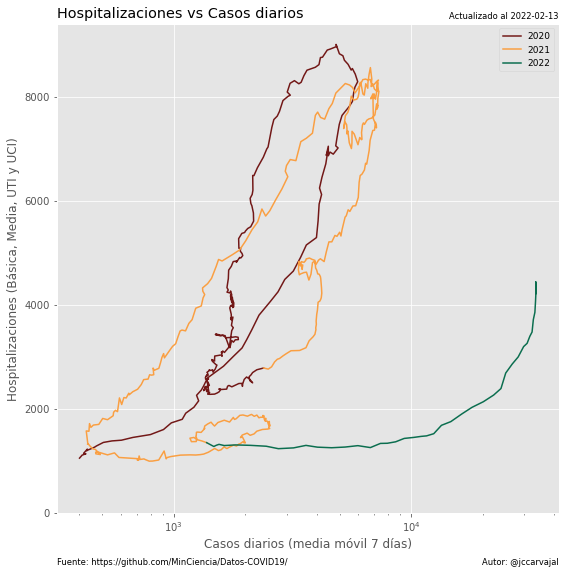

In [58]:
# Paso 3: Visualizar data
#style_fig()
plt.figure(figsize=(9,9))

x_1 = resumen_filtrada_1['Nacional']
y_1 = resumen_filtrada_1['Hospitalizaciones']
x_2 = resumen_filtrada_2['Nacional']
y_2 = resumen_filtrada_2['Hospitalizaciones']
x_3 = resumen_filtrada_3['Nacional']
y_3 = resumen_filtrada_3['Hospitalizaciones']

plt.plot(x_1, y_1, color='#721817')
plt.plot(x_2, y_2, color='#FA9F42')
plt.plot(x_3, y_3, color='#0B6E4F')

plt.title('Hospitalizaciones vs Casos diarios', loc='left')
plt.legend(['2020', '2021', '2022'], loc='upper right', prop={'size': 9})
plt.xlabel('Casos diarios (media móvil 7 días)')
plt.ylabel('Hospitalizaciones (Básica, Media, UTI y UCI)')
#plt.xlim(xmin=0)
plt.xscale("log")
plt.ylim(ymin=0)

# Agregar textos a imágenes
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-45), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-45), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Prueba 2.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

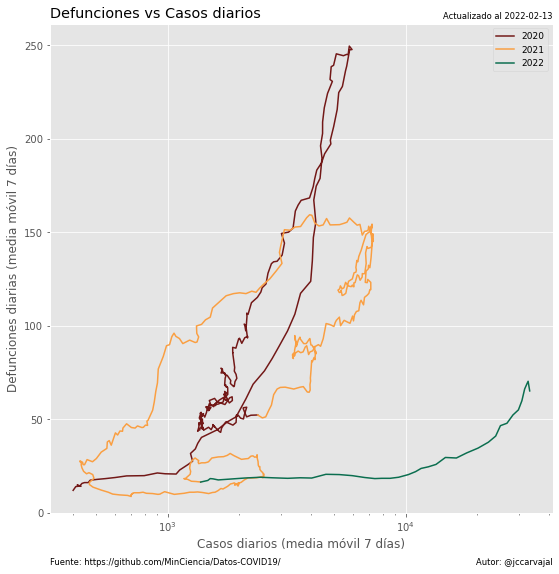

In [59]:
# Paso 3: Visualizar data
#style_fig()
plt.figure(figsize=(9,9))

x_1 = resumen_filtrada_1['Nacional']
y_1 = resumen_filtrada_1['Confirmados y sospechosos']
x_2 = resumen_filtrada_2['Nacional']
y_2 = resumen_filtrada_2['Confirmados y sospechosos']
x_3 = resumen_filtrada_3['Nacional']
y_3 = resumen_filtrada_3['Confirmados y sospechosos']

plt.plot(x_1, y_1, color='#721817')
plt.plot(x_2, y_2, color='#FA9F42')
plt.plot(x_3, y_3, color='#0B6E4F')

plt.title('Defunciones vs Casos diarios', loc='left')
plt.legend(['2020', '2021', '2022'], loc='upper right', prop={'size': 9})
plt.xlabel('Casos diarios (media móvil 7 días)')
plt.ylabel('Defunciones diarias (media móvil 7 días)')
#plt.xlim(xmin=0)
plt.xscale("log")
plt.ylim(ymin=0)

# Agregar textos a imágenes
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-45), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-45), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Prueba 3.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

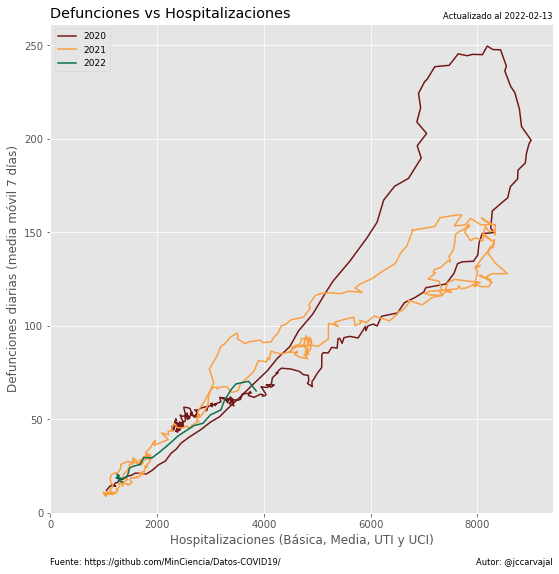

In [60]:
# Paso 3: Visualizar data
#style_fig()
plt.figure(figsize=(9,9))

x_1 = resumen_filtrada_1['Hospitalizaciones']
y_1 = resumen_filtrada_1['Confirmados y sospechosos']
x_2 = resumen_filtrada_2['Hospitalizaciones']
y_2 = resumen_filtrada_2['Confirmados y sospechosos']
x_3 = resumen_filtrada_3['Hospitalizaciones']
y_3 = resumen_filtrada_3['Confirmados y sospechosos']

plt.plot(x_1, y_1, color='#721817')
plt.plot(x_2, y_2, color='#FA9F42')
plt.plot(x_3, y_3, color='#0B6E4F')

plt.title('Defunciones vs Hospitalizaciones', loc='left')
plt.legend(['2020', '2021', '2022'], loc='upper left', prop={'size': 9})
plt.xlabel('Hospitalizaciones (Básica, Media, UTI y UCI)')
plt.ylabel('Defunciones diarias (media móvil 7 días)')
plt.xlim(xmin=0)
plt.ylim(ymin=0)

# Agregar textos a imágenes
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-45), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-45), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Prueba 4.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## Tasa de incidencia semanal

In [61]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto90/incidencia_en_vacunados.csv'
dl = requests.get(url).content
dp90 = pd.read_csv(io.StringIO(dl.decode('utf-8')))

# trabajar con copia de df
dp90_edit = dp90

# transformar string de semana epidemiologica a datetime
dp90_edit['semana_epidemiologica'] = dp90_edit['semana_epidemiologica'].astype(str) + '-1'
dp90_edit['semana_fecha'] = pd.to_datetime(dp90_edit['semana_epidemiologica'], format = '%Y-%W-%w') - pd.Timedelta(2, unit='d')

# mover columna semana al inicio
dp90_edit = dp90_edit[ ['semana_fecha'] + [ col for col in dp90_edit.columns if col != 'semana' ] ]

dp90_edit.tail(5)

,semana_fecha,semana_epidemiologica,sin_vac_casos,una_dosis_casos,dos_dosis_casos,dos_dosis_comp_casos,dosis_unica_casos,dosis_unica_comp_casos,dosis_ref_comp_casos,sin_vac_uci,...,una_dosis_fall,dos_dosis_fall,dos_dosis_comp_fall,dosis_unica_fall,dosis_unica_comp_fall,dosis_ref_comp_fall,personas_con_una_dosis,personas_con_pauta_completa,personas_con_refuerzo,semana_fecha
52,2022-01-01,2022-01-1,4457,783,120,10055,0,766,13256,48,...,2,0,28,0,0,26,16825505.0,16647331.0,11634636.0,2022-01-01
53,2022-01-08,2022-02-1,8839,1776,319,18981,0,1315,33762,44,...,4,0,29,0,0,52,16906958.0,16773675.0,11996733.0,2022-01-08
54,2022-01-15,2022-03-1,14239,3262,693,32364,0,1951,70032,54,...,2,0,42,0,1,66,16976172.0,16861395.0,12250830.0,2022-01-15
55,2022-01-22,2022-04-1,20992,5151,1009,49671,1,2605,123527,72,...,5,0,40,0,1,81,17032894.0,16935842.0,12437023.0,2022-01-22
56,2022-01-29,2022-05-1,16258,4060,668,37315,1,1834,111076,36,...,2,0,7,0,0,24,17081475.0,17012183.0,12596063.0,2022-01-29


In [62]:
# Paso 2: Transformar data
semana = 7
x = dp90_edit['semana_fecha']
y_c_1 = dp90_edit['sin_vac_casos'] / semana
y_c_2 = (dp90_edit['una_dosis_casos'] + dp90_edit['dosis_unica_casos']) / semana
y_c_3 = (dp90_edit['dos_dosis_casos'] + dp90_edit['dosis_unica_casos']) / semana
y_c_4 = (dp90_edit['dos_dosis_comp_casos'] + dp90_edit['dosis_unica_comp_casos']) / semana
y_c_5 = dp90_edit['dosis_ref_comp_casos'] / semana

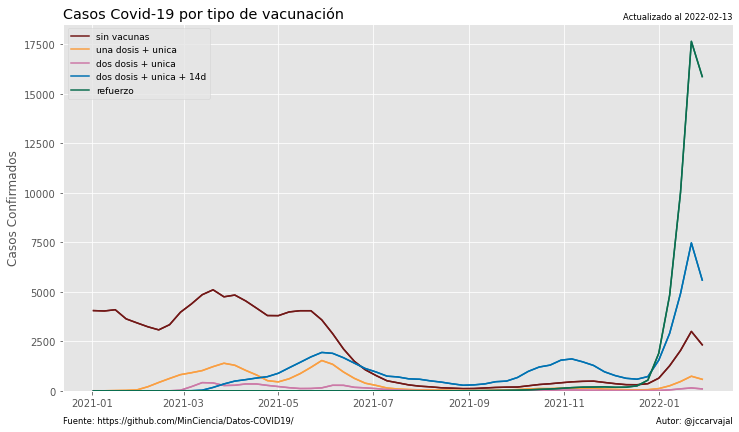

In [63]:
# Paso 3: Visualizar data
style_fig()

plt.plot(x, y_c_1, color='#721817', label='sin vacunas')
plt.plot(x, y_c_2, color='#FA9F42', label='una dosis + unica')
plt.plot(x, y_c_3, color='#CC79A7', label='dos dosis + unica')
plt.plot(x, y_c_4, color='#0072B2', label='dos dosis + unica + 14d')
plt.plot(x, y_c_5, color='#0B6E4F', label='refuerzo')
plt.ylim(ymin=0)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', prop={'size': 9})

plt.title('Casos Covid-19 por tipo de vacunación', loc='left')
plt.xlabel('')
plt.ylabel('Casos Confirmados')
filename = 'Por tipo de vacunación - Casos Covid-19'

save_fig(filename)
plt.show()

In [64]:
# Paso 2: Transformar data
semana = 7
x = dp90_edit['semana_fecha']
y_h_1 = dp90_edit['sin_vac_uci'] / semana
y_h_2 = (dp90_edit['una_dosis_uci'] + dp90_edit['dosis_unica_uci']) / semana
y_h_3 = (dp90_edit['dos_dosis_uci'] + dp90_edit['dosis_unica_uci']) / semana
y_h_4 = (dp90_edit['dos_dosis_comp_uci'] + dp90_edit['dosis_unica_comp_uci']) / semana
y_h_5 = dp90_edit['dosis_ref_comp_uci'] / semana

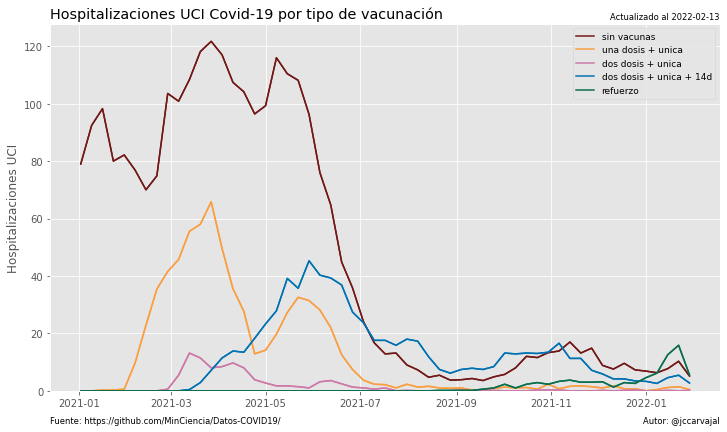

In [65]:
# Paso 3: Visualizar data
style_fig()

plt.plot(x, y_h_1, color='#721817', label='sin vacunas')
plt.plot(x, y_h_2, color='#FA9F42', label='una dosis + unica')
plt.plot(x, y_h_3, color='#CC79A7', label='dos dosis + unica')
plt.plot(x, y_h_4, color='#0072B2', label='dos dosis + unica + 14d')
plt.plot(x, y_h_5, color='#0B6E4F', label='refuerzo')
plt.ylim(ymin=0)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', prop={'size': 9})

plt.title('Hospitalizaciones UCI Covid-19 por tipo de vacunación', loc='left')
plt.xlabel('')
plt.ylabel('Hospitalizaciones UCI')
filename = 'Por tipo de vacunación - Hospitalizaciones UCI'

save_fig(filename)
plt.show()

In [66]:
# Paso 2: Transformar data
semana = 7
x = dp90_edit['semana_fecha']
y_d_1 = dp90_edit['sin_vac_fall'] / semana
y_d_2 = (dp90_edit['una_dosis_fall'] + dp90_edit['dosis_unica_fall']) / semana
y_d_3 = (dp90_edit['dos_dosis_fall'] + dp90_edit['dosis_unica_fall']) / semana
y_d_4 = (dp90_edit['dos_dosis_comp_fall'] + dp90_edit['dosis_unica_comp_fall']) / semana
y_d_5 = dp90_edit['dosis_ref_comp_fall'] / semana

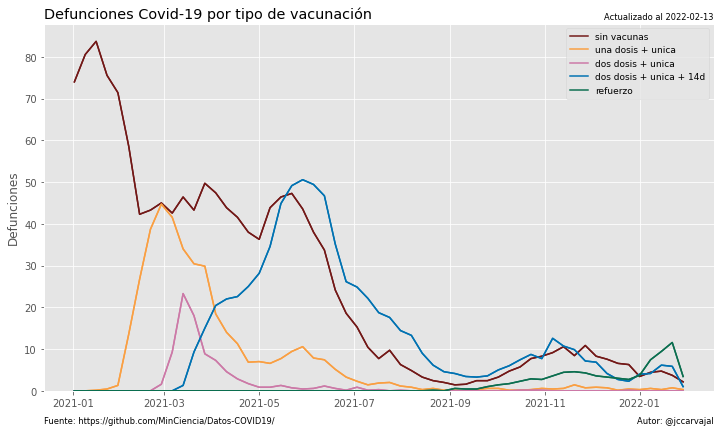

In [67]:
# Paso 3: Visualizar data
style_fig()

plt.plot(x, y_d_1, color='#721817', label='sin vacunas')
plt.plot(x, y_d_2, color='#FA9F42', label='una dosis + unica')
plt.plot(x, y_d_3, color='#CC79A7', label='dos dosis + unica')
plt.plot(x, y_d_4, color='#0072B2', label='dos dosis + unica + 14d')
plt.plot(x, y_d_5, color='#0B6E4F', label='refuerzo')
plt.ylim(ymin=0)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', prop={'size': 9})

plt.title('Defunciones Covid-19 por tipo de vacunación', loc='left')
plt.xlabel('')
plt.ylabel('Defunciones')
filename = 'Por tipo de vacunación - Defunciones Covid-19'

save_fig(filename)
plt.show()